# Importing the libraries

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
sns.set_theme(style='white', palette='summer')#formt theme

# Loading the data

In [424]:
df=pd.read_csv("f_cardio_train.csv.csv", sep = ";")

In [425]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


# Data Cleaning

In [426]:
# 1. missing check
df = df.replace(" ", np.nan).replace("?", np.nan).replace('!', np.nan)
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [427]:
#2. duplicate check
df.duplicated().sum()

0

In [428]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0


In [429]:
# 3. Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [430]:
#Check Categories for purpose
df.cholesterol.unique()

array([1, 3, 2], dtype=int64)

In [431]:
#Check Categories for purpose
df.gluc.unique()

array([1, 2, 3], dtype=int64)

In [432]:
#Check Categories for purpose
df.active.unique()

array([1, 0], dtype=int64)

In [433]:
df_clean=df.drop(columns=['id','alco'])

In [434]:
#change age from day to years
df_clean["age"] = round(df_clean["age"] / 365)

In [435]:
# calculate the BMI score 
df_clean['BMI'] = df_clean['weight']/((df_clean['height']/100)**2)

# categorize normal & notnormal
#def bmi_categorize(bmi_score):
  #if 18.5 <= bmi_score <= 25:
   # return "Normal"
  #else:
   # return "notnormal"

In [436]:
df_clean.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,BMI
0,50.000000,2,168,62.000000,110,80,1,1,0,1,0,21.967120
1,55.000000,1,156,85.000000,140,90,3,1,0,1,1,34.927679
2,52.000000,1,165,64.000000,130,70,3,1,0,0,1,23.507805
3,48.000000,2,169,82.000000,150,100,1,1,0,1,1,28.710479
4,48.000000,1,156,56.000000,100,60,1,1,0,0,0,23.011177


In [437]:
df_clean.drop('height', axis=1, inplace=True)
df_clean.drop('weight', axis=1, inplace=True)

In [438]:
df_clean.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,BMI
0,50.000000,2,110,80,1,1,0,1,0,21.967120
1,55.000000,1,140,90,3,1,0,1,1,34.927679
2,52.000000,1,130,70,3,1,0,0,1,23.507805
3,48.000000,2,150,100,1,1,0,1,1,28.710479
4,48.000000,1,100,60,1,1,0,0,0,23.011177


# EDA


<AxesSubplot:xlabel='cardio', ylabel='count'>

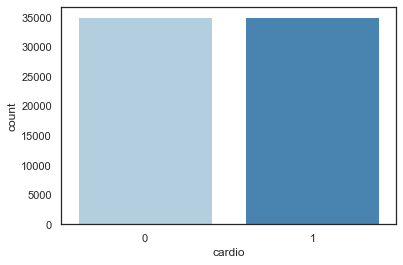

In [439]:
sns.countplot(x ='cardio', data = df_clean, palette = "Blues")

In [440]:
a = df_clean[df_clean["gender"]==0]["BMI"].mean()
b = df_clean[df_clean["gender"]==1]["BMI"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender1)

Gender:1 is female & Gender:2 is male


C:\Users\f-al-\.conda\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


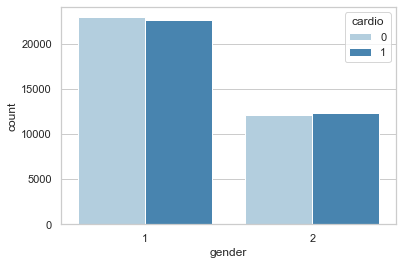

In [441]:
sns.set_style('whitegrid')
sns.countplot(df_clean.gender,hue=df_clean.cardio, palette="Blues");

C:\Users\f-al-\.conda\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\f-al-\.conda\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\f-al-\.conda\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a depr

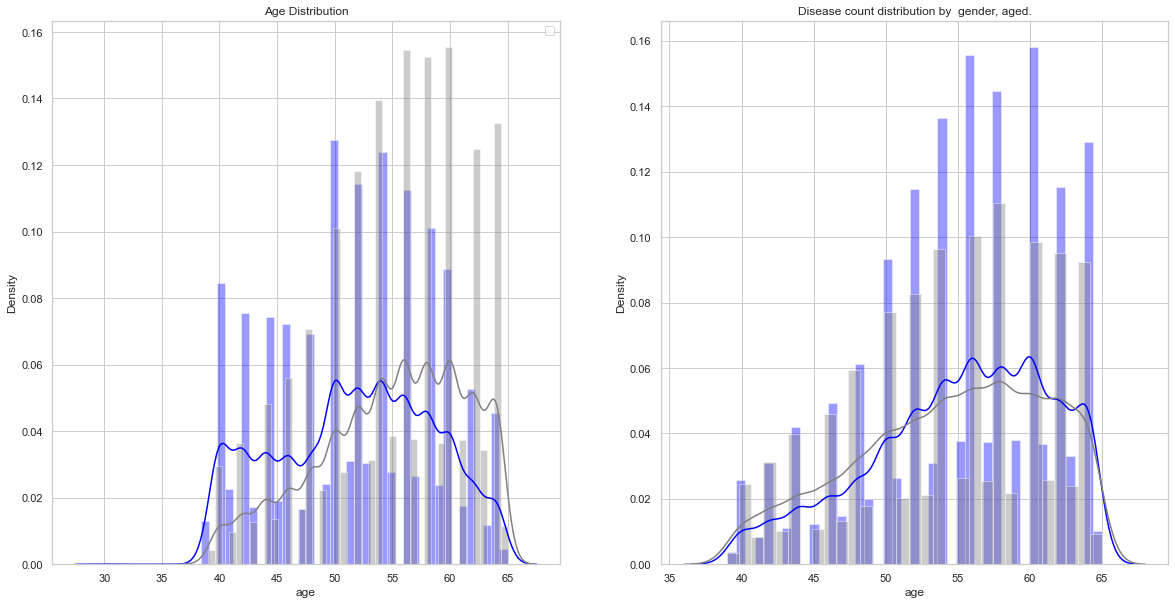

In [443]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df_clean['age'][df['cardio']==0], ax = ax1, color='Blue')
sns.distplot(df_clean['age'][df['cardio']==1], ax = ax1,color='gray')
ax1.set_title('Age Distribution')
ax1.legend()
sns.distplot(df_clean['age'][(df['gender']==1) & (df['cardio']==1)],ax = ax2,color='Blue')
sns.distplot(df_clean['age'][(df['gender']==2) & (df['cardio']==1)],ax = ax2,color='gray')
ax2.set_title('Disease count distribution by  gender, aged.')
plt.show()

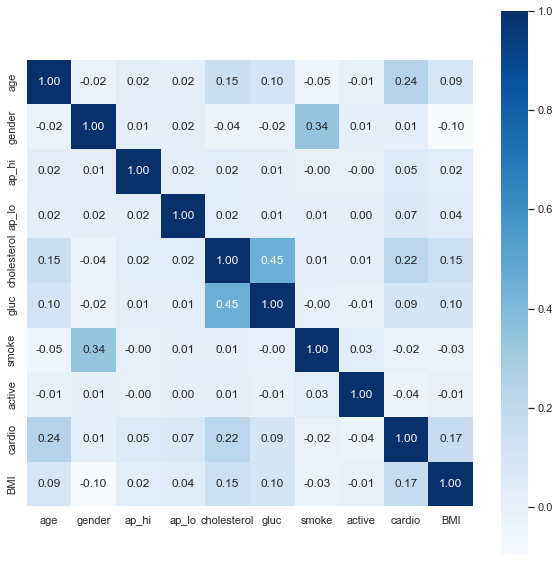

In [444]:
correlation = df_clean.corr()
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12});


# 4. Baseline Model

# How many have cardiovascular disease and not have cardiovascular disease are there then?

In [324]:
num = df_clean["cardio"].value_counts("0")
num

0    0.500300
1    0.499700
Name: cardio, dtype: float64

In [325]:
num_ns = 70000 * 0.500300
num_s = 70000 * 0.499700

print("There are " + str(num_ns) + " Non-cardio and " + str(num_s) + " cardio in the data set.")

There are 35021.0 Non-cardio and 34979.0 cardio in the data set.


# Binary Classification for cardio/Non-cardio Distinction

first Defining X and y and Splitting data

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
# As usual, create our train/test split
X = df_clean.drop(columns = 'cardio')
y = df_clean['cardio']
#Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

Method 1: Naive Bayes

In [328]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.59


Method 2: Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.7206666666666667


Method 3: Decision Tree

In [402]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train,y_train )
dt_y_pred = dt_model.predict(X_test)
#Model Score
from sklearn.metrics import accuracy_score
print('The decision Tree model accuracy score was {}% on test dataset'.format(round(accuracy_score(dt_y_pred, y_test)*100)))

The decision Tree model accuracy score was 64% on test dataset


Method 4:Bagging

In [403]:
# Bagging
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier().fit(X_train,y_train)
bag_y_pred = bag_model.predict(X_test)
print('The Bagging model accuracy score was {}% on test dataset'.format(round(accuracy_score(bag_y_pred, y_test)*100)))

The Bagging model accuracy score was 68% on test dataset


Method 5: Random Forest

In [404]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_features=9, max_depth = 2, random_state= 42).fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
print('The Random Forest model accuracy score was {}% on test dataset'.format(round(accuracy_score(rf_y_pred, y_test)*100)))

The Random Forest model accuracy score was 72% on test dataset


In [405]:
model = RandomForestClassifier(criterion = "entropy")
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6894761904761905

XGBoost

In [408]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [409]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\f-al-\.conda\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\f-al-\.conda\envs\metis\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.7397142857142858

In [410]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    res1=accuracy_score(y_test,pred)
print("K Nearest Neighbors Top 5 Success Rates is:" , "{:.2f}%".format(100*res1))

K Nearest Neighbors Top 5 Success Rates is: 72.33%


In [411]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
pred1=rf.predict(X_test)
res2=accuracy_score(y_test,pred1)
print("Random Forest Classifier Success Rate is :", "{:.2f}%".format(100*res2))

Random Forest Classifier Success Rate is : 68.81%


In [412]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)
res3=logreg100.score(X_test, y_test)

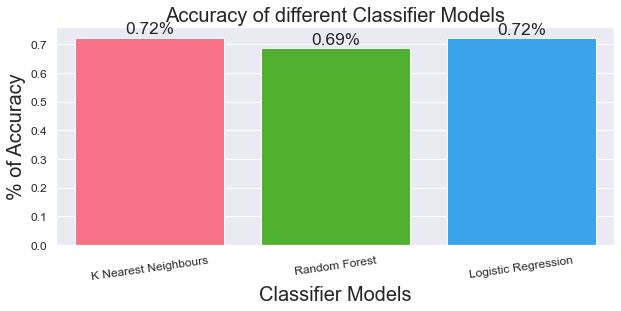

In [413]:
lst = [res1, res2,res3]
lst
lst2 = ["K Nearest Neighbours" , "Random Forest","Logistic Regression" ]
plt.rcParams['figure.figsize']=10,4
sns.set_style('darkgrid')
ax = sns.barplot(x=lst2, y=lst, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# addational figer

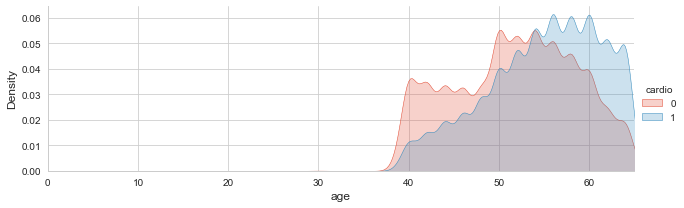

In [316]:
# Visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(df_clean, hue="cardio", aspect=3)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df_clean['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()